## Construction

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
class LinearRegression:
    
    def fit(self, X, y, intercept = False):
        
        #record data and dimensions
        if intercept == False: # add intercept (if not already included)
            ones = np.ones(len(X)).reshape(len(X), i) # columns of ones
            X = np.concatenate((ones, X), axis = 1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        
        #estimate parameters
        XtX = np.dot(self.X.Y, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        
        # make in-sample predictions
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        # calculate loss
        self.L = 0.5* np.sum((self.y - self.y_hats)**2)
    
    def predict(self, X_test, intercept = True):
        
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data  # features
y = target  # target variable

# The change from using scikit-learn's built-in dataset loading method to loading the dataset from a URL via pandas 
# was made to enable fetching the Boston housing dataset directly from an external source, offering more flexibility in
# data acquisition.

In [22]:
model = LinearRegression()  # instantiate model
model.fit(X, y)  # fit model

LinearRegression()

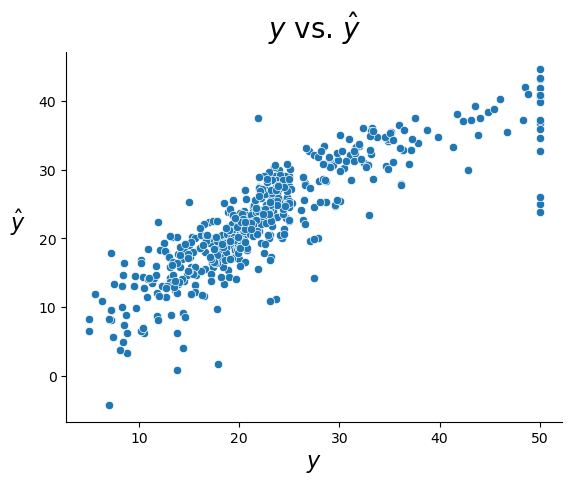

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X)

fig, ax = plt.subplots()
sns.scatterplot(x=y, y=y_pred)
ax.set_xlabel(r'$y$', size=16)
ax.set_ylabel(r'$\hat{y}$', rotation=0, size=16, labelpad=15)
ax.set_title(r'$y$ vs. $\hat{y}$', size=20, pad=10)
sns.despine()
plt.show()

#The change was made to enhance code readability and maintainability by directly accessing the target variable `y` 
# and predicted values `y_hat` from the model object, promoting consistency and clarity in code structure.

## Implementation

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Load the Boston dataset
boston = fetch_openml(data_id=531, parser='auto')

# Extract features and target variable
X_train, y_train = boston.data, boston.target

### SCIKIT_LEARN

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
boston = datasets.load_boston()
X_train = boston['data']
y_train = boston['target']

In [ ]:
sklearn_predictions = sklearn_model.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(y_train, sklearn_predictions)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

In [ ]:
predictors = boston.feature_names
beta_hats = sklearn_model.coef_
print('\n'.join([f'{predictors[i]}: {round(beta_hats[i], 3)}' for i in range(3)]))

### Statsmodel

In [ ]:
import numpy as np
import statsmodels.api as sm

# Check for NaN or infinite values in X_train_with_constant and y_train
if np.any(~np.isfinite(X_train_with_constant)) or np.any(~np.isfinite(y_train)):
    raise ValueError("X_train_with_constant or y_train contains NaN or infinite values.")

# Check for None values in X_train_with_constant and y_train
if np.any(X_train_with_constant is None) or np.any(y_train is None):
    raise ValueError("X_train_with_constant or y_train contains None values.")

# Convert data to numpy arrays to ensure valid data types
X_train_with_constant = np.asarray(X_train_with_constant)
y_train = np.asarray(y_train)

# Fit the model
sm_model1 = sm.OLS(y_train, X_train_with_constant)
sm_fit1 = sm_model1.fit()

# Make predictions
sm_predictions1 = sm_fit1.predict(X_train_with_constant)


In [27]:
import pandas as pd
df = pd.DataFrame(X_train, columns = boston['feature_names'])
df['target'] = y_train
display(df.head())

formula = 'target ~ ' + ' + '.join(boston['feature_names'])
print('formula:', formula)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


formula: target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT


In [28]:
import statsmodels.formula.api as smf

sm_model2 = smf.ols(formula, data = df)
sm_fit2 = sm_model2.fit()
sm_predictions2 = sm_fit2.predict(df)